<a href="https://colab.research.google.com/github/val93s/Machine_learning/blob/main/Copy_of_11_3_1_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.3.1 Activity

##Breast cancer detection

###According to the American Cancer Society:

Breast cancer  is the most common cancer in American women other than skin cancers. The average risk of a woman in the United States developing breast cancer sometime in her life is about 13%. This means there is a one in eight chance that she will develop breast cancer.

Mammograms are used to detect breast cancer—hopefully at an early stage. However, many masses that appear on a mammogram are not actually cancer. Developing a machine learning model to predict whether a tumor is benign or cancerous would be helpful for physicians as they guide and treat patients.

In this activity we will build our first logistic regression model to classify tumors as benign or malignant based on their perimeter mean.



#Step 1: Download and save the `cancer.csv` dataset from the class materials.  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `cancer.csv` dataset by running the following code block. 

* When prompted, navigate to and select the `cancer.csv` dataset from where you saved it on your computer.

In [ ]:
#Step 2

from google.colab import files
cancer = files.upload()

Saving cancer.csv to cancer (1).csv


#Step 3: Import necessary packages.

```
* import pandas as pd
* import seaborn as sns
* from sklearn.model_selection import train_test_split
* from sklearn.linear_model import LinearRegression
* from sklearn.metrics import r2_score, mean_squared_error as MSE
* from sklearn.linear_model import LogisticRegression

```

In [ ]:
#Step 3

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression



# Step 4: Create a Pandas DataFrame from the CSV file.
* Name the DataFrame `cancer`.
* Print the first five observations of `cancer`.  Note the kinds of data it contains.

In [ ]:
#Step 4
cancer = pd.read_csv('cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


#Step 5: Print the shape of `cancer`. 
* How many individuals were measured as part of the study?

In [ ]:
#Step 5
cancer.shape



(569, 12)

#Step 5: 

Answer: 

#Step 6: Convert the variable `Diagnosis` into a numeric data type.  
* There are many way to accomplish this, but you may choose to work with the example shown below.  

```
cancer.loc[cancer['diagnosis'] == 'M', 'cancer_present'] = 1
cancer.loc[cancer['diagnosis'] == 'B', 'cancer_present'] = 0

```
* Name the result `cancer_present` and code malignant tumors with a `1` and benign tumors with a `0`.






In [ ]:
#Step 6
cancer.loc[cancer['diagnosis'] == 'M', 'cancer_present'] = 1
cancer.loc[cancer['diagnosis'] == 'B', 'cancer_present'] = 0



#Step 7: Use Seaborn (or another plotting library of your choice) to plot the relationship between `perimeter_mean` and `cancer_present`.
* Plot `perimeter_mean` on the x-axis and `cancer_present` on the y-axis.
* You may use the following template if you are creating your graph using Seaborn:

```
sns.lmplot(x-variable, y-variable, data=dataset)

```
* Does the model seem to fit the data well?





/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


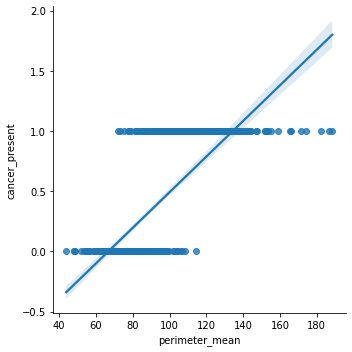

In [ ]:
#Step 7
sns.lmplot('perimeter_mean', 'cancer_present', data=cancer)



#Step 7

Answer: 

#Step 8: Split the data into the target variable and the feature of interest.
* We want to predict whether a tumor is benign or malignant (`cancer_present`) using the mean tumor perimeter measure (`perimeter_mean`).
* Select the column `perimenter_mean` from the cancer DataFrame and name the resulting DataFrame X.
Select the column `cancer_present` from the cancer DataFrame and name it y. Make sure y is also a DataFrame and not a Series.

In [ ]:
#Step 8
X = cancer[['perimeter_mean']]
y = cancer[['cancer_present']]


#Step 9: Split the data into a training/validation dataset and a test dataset.
* Use `train_test_split` from `sklearn.model_selection`.
* Name the X training/validation set `X_train_val` and the y training/validation set `y_train_val`.
* Name the X test set `X_test` and the y test set `y_test`.
* Set the `test_size = 0.25` and `random_state = 42`. 






In [ ]:
#Step 9
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



#Step 10: Split the training/validation dataset into a training set and validation set.
* Use `train_test_split` from `sklearn.model_selection` to split `X_train_val` and `y_train_val` into `X_train`, `X_val`, `y_train`, and `y_val`.
* Set the `test_size = 0.333` (this will be the size of the validation set) and `random_state = 42`.





In [ ]:
#Step 10
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.333, random_state=42)







#Step 11: Instantiate and fit a logistic regression model.
* Name the model `log_reg` and specify `random_state=0`.
* Fit the data to `X_train` and `y_train` using `.fit()`.
* Name the fitted model `log_reg_model`.





In [ ]:
#Step 11
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Step 12: Calculate the model accuracy.
* Calculate the model accuracy using `.score()`.
* Name the results `accuracy` and print its value.





In [ ]:
#Step 12
accuracy = log_reg_model.score(X_train, y_train)
print(accuracy)



0.8908450704225352


#Step 13: Calculate the predicted probability of each tumor being benign or malignant.
* Calculate predicted probabilities for the training data using `.predict_proba()`.
* Name the results `probs_`.
* Convert `probs_` to a Panda's DataFrame and name the results `probs`.
* Print the header of `probs`.





In [ ]:
#Step 13
probs_ = log_reg_model.predict_proba(X_train)
probs = pd.DataFrame(probs_)
probs.head()





,0,1
0,0.878251,0.121749
1,0.183882,0.816118
2,0.986293,0.013707
3,0.540649,0.459351
4,0.000414,0.999586


#Step 14: Calculate the predicted class of each tumor being benign or malignant.
* Calculate predicted probabilities for the training data using `.predict()`.
* Name the results `classes_`.
* Convert `classes_` to a Panda's DataFrame and name the results `classes`.
* Print the header of `classes`.





In [ ]:
#Step 14
classes_ = log_reg_model.predict(X_train)
classes = pd.DataFrame(classes_)
classes.head()





,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


#Step 15: Compare the predicted probabilities of a tumor being benign or malignant with its predicted classificiation.
* Run the code block below to concatenate the X_train matrix with the predictied probabilities and classes of each tumor.
* The code will generate a plot of the predicted probability of a tumor being malignant against the mean perimeter size.  The plot is color coded by the model prediction for whether the tumor is benign or malignant.





/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


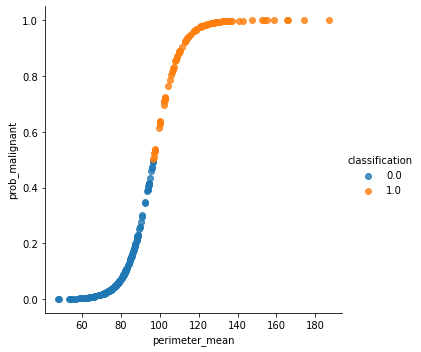

In [ ]:
#Step 15

X_train.reset_index(inplace=True)

predicted = pd.concat([X_train,probs[1], classes],axis=1)

predicted.rename({1: 'prob_malignant', 0:'classification'}, axis=1, inplace=True)


sns.lmplot('perimeter_mean', 'prob_malignant', data=predicted, hue ='classification', fit_reg=False)


